In [184]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

### Problem

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Reading Data

In [185]:
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [186]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [188]:
#Restricting the data points to only Sale Condition Normal because other conditions might not denote the right price
data1 = data[data['SaleCondition']=='Normal']
data1.shape

(1198, 81)

In [189]:
#Checking for columns with missing values
round(data1.isnull().sum()/len(data1.index),2)[round(data1.isnull().sum()/len(data1.index),2).values>0]

LotFrontage     0.20
Alley           0.94
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
FireplaceQu     0.47
GarageType      0.05
GarageYrBlt     0.05
GarageFinish    0.05
GarageQual      0.05
GarageCond      0.05
PoolQC          1.00
Fence           0.80
MiscFeature     0.96
dtype: float64

In [190]:
#Dropping all irrelevant columns and any column that has more than 10% missing values
data2 = data1.drop(['Id','LotFrontage'], axis=1)

In [191]:
#There are columns where numbers actually don't mean numbers but they have a categorical meaning
#Creating a dummy dictionary to convert int type values to str
data_dict1 = {
    20 : '1_STORYNEW',
    30 : '1_STORYOLD',
    40 : '1_STORY_WF_ATTC',
    45 : '1_H_STORYUNF',
    50 : '1_H_STORYFIN',
    60 : '2_STORYNEW',
    70 : '2_STORYOLD',
    75 : '2_H_STORY',
    80 : 'SPLIT_OR_MULTI',
    85 : 'SPLIT_FOYER',
    90 : 'DUPLEX',
    120 : '1_STORYPUD',
    150 : '1_H_STORYPUD',
    160 : '2_STORYPUD',
    180 : 'PUD_MULTILEVEL',
    190 : '2_FAM_CONV'
}

data_dict2 = {
    1 : 'V_Poor',
    2 : 'Poor',
    3 : 'Fair',
    4 : 'Below_Avg',
    5 : 'Avg',
    6 : 'Above_Avg',
    7 : 'Good',
    8 : 'V_Good',
    9 : 'Exc',
    10 : 'V_Exc'
}

In [192]:
data2 = data2.replace({"MSSubClass": data_dict1 })

In [193]:
data2 = data2.replace({"OverallQual": data_dict2 })

In [194]:
data2 = data2.replace({"OverallCond": data_dict2 })

In [195]:
#NA Values in the below columns actually mean different than what's read in the python notebook
data2["Alley"].fillna("No_Alley", inplace=True)
data2["BsmtQual"].fillna("No_Bsmt", inplace=True)
data2["BsmtCond"].fillna("No_Bsmt", inplace=True)
data2["BsmtExposure"].fillna("No_Bsmt", inplace=True)
data2["BsmtFinType1"].fillna("No_Bsmt", inplace=True)
data2["BsmtFinType2"].fillna("No_Bsmt", inplace=True)
data2["FireplaceQu"].fillna("No_Fireplace", inplace=True)
data2["GarageType"].fillna("No_Garage", inplace=True)
data2["GarageFinish"].fillna("No_Garage", inplace=True)
data2["GarageQual"].fillna("No_Garage", inplace=True)
data2["GarageCond"].fillna("No_Garage", inplace=True)
data2["PoolQC"].fillna("No_Pool", inplace=True)
data2["Fence"].fillna("No_Fence", inplace=True)

#### As the dataset size is small, we should look at categorical variables and their class composition, ideally columns with class composition of 75+% can be safely excluded from the analysis

In [196]:
data2['Condition2'].value_counts(normalize=True)

Norm      0.990818
Feedr     0.004174
RRNn      0.001669
Artery    0.000835
PosA      0.000835
RRAn      0.000835
RRAe      0.000835
Name: Condition2, dtype: float64

In [197]:
data2['MSZoning'].value_counts(normalize=True)

RL         0.797162
RM         0.157763
FV         0.032554
RH         0.009182
C (all)    0.003339
Name: MSZoning, dtype: float64

In [198]:
data2['Condition1'].value_counts(normalize=True)

Norm      0.860601
Feedr     0.055927
Artery    0.033389
RRAn      0.017529
PosN      0.014190
RRAe      0.006678
PosA      0.006678
RRNn      0.003339
RRNe      0.001669
Name: Condition1, dtype: float64

In [199]:
data2['GarageCond'].value_counts(normalize=True)

TA           0.910684
No_Garage    0.050918
Fa           0.026711
Gd           0.005843
Po           0.004174
Ex           0.001669
Name: GarageCond, dtype: float64

In [200]:
data2['Heating'].value_counts(normalize=True)

GasA     0.974958
GasW     0.014190
Grav     0.005008
Wall     0.003339
OthW     0.001669
Floor    0.000835
Name: Heating, dtype: float64

In [201]:
data2['LandSlope'].value_counts(normalize=True)

Gtl    0.945743
Mod    0.046745
Sev    0.007513
Name: LandSlope, dtype: float64

In [202]:
data2['Street'].value_counts(normalize=True)

Pave    0.995826
Grvl    0.004174
Name: Street, dtype: float64

In [203]:
data2['BsmtCond'].value_counts(normalize=True)

TA         0.901503
Gd         0.037563
Fa         0.033389
No_Bsmt    0.026711
Po         0.000835
Name: BsmtCond, dtype: float64

In [204]:
data2['RoofMatl'].value_counts(normalize=True)

CompShg    0.984140
WdShngl    0.005008
Tar&Grv    0.005008
WdShake    0.003339
Metal      0.000835
Membran    0.000835
Roll       0.000835
Name: RoofMatl, dtype: float64

In [205]:
data2['RoofStyle'].value_counts(normalize=True)

Gable      0.785476
Hip        0.191987
Gambrel    0.008347
Flat       0.006678
Mansard    0.005843
Shed       0.001669
Name: RoofStyle, dtype: float64

In [206]:
data2['Functional'].value_counts(normalize=True)

Typ     0.924875
Min2    0.026711
Min1    0.022538
Mod     0.011686
Maj1    0.010851
Maj2    0.003339
Name: Functional, dtype: float64

In [207]:
data2['BldgType'].value_counts(normalize=True)

1Fam      0.839733
TwnhsE    0.075125
Duplex    0.030885
Twnhs     0.030885
2fmCon    0.023372
Name: BldgType, dtype: float64

In [208]:
data2['BsmtFinType2'].value_counts(normalize=True)

Unf        0.849750
Rec        0.040067
LwQ        0.032554
No_Bsmt    0.027546
BLQ        0.025042
ALQ        0.014190
GLQ        0.010851
Name: BsmtFinType2, dtype: float64

In [209]:
data2['PavedDrive'].value_counts(normalize=True)

Y    0.913189
N    0.062604
P    0.024207
Name: PavedDrive, dtype: float64

In [210]:
data2['CentralAir'].value_counts(normalize=True)

Y    0.933222
N    0.066778
Name: CentralAir, dtype: float64

In [211]:
data2['ExterCond'].value_counts(normalize=True)

TA    0.868948
Gd    0.108514
Fa    0.019199
Ex    0.002504
Po    0.000835
Name: ExterCond, dtype: float64

In [212]:
data2['Electrical'].value_counts(normalize=True)

SBrkr    0.913116
FuseA    0.065163
FuseF    0.020050
FuseP    0.001671
Name: Electrical, dtype: float64

In [213]:
data2['LandContour'].value_counts(normalize=True)

Lvl    0.903172
Bnk    0.040902
HLS    0.029215
Low    0.026711
Name: LandContour, dtype: float64

In [214]:
data2['PoolQC'].value_counts(normalize=True)

No_Pool    0.997496
Fa         0.001669
Gd         0.000835
Name: PoolQC, dtype: float64

In [215]:
data2['MiscFeature'].value_counts(normalize=True)

Shed    0.90
Gar2    0.04
Othr    0.04
TenC    0.02
Name: MiscFeature, dtype: float64

In [216]:
data2['GarageQual'].value_counts(normalize=True)

TA           0.901503
No_Garage    0.050918
Fa           0.033389
Gd           0.010017
Ex           0.002504
Po           0.001669
Name: GarageQual, dtype: float64

In [217]:
data2['Utilities'].value_counts(normalize=True)

AllPub    1.0
Name: Utilities, dtype: float64

In [218]:
data2['SaleType'].value_counts(normalize=True)

WD       0.968280
COD      0.015860
ConLD    0.005008
ConLw    0.004174
ConLI    0.003339
CWD      0.001669
Con      0.001669
Name: SaleType, dtype: float64

In [219]:
#Dropping all irrelevant columns from the above conclusions
data3 = data2.drop(['Condition2','MSZoning','Condition1','GarageCond','Heating','LandSlope','Street','BsmtCond','RoofMatl','RoofStyle','Functional','BldgType','BsmtFinType2','PavedDrive','CentralAir','ExterCond','Electrical','LandContour','PoolQC','MiscFeature','GarageQual','Utilities','SaleType'], axis=1)

In [220]:
data3 = data3.drop('SaleCondition', axis=1)

#### Performing Missing Value imputation with Mode for the remaining columns

In [221]:
data3.isnull().sum()[data3.isnull().sum()>0]

MasVnrType      4
MasVnrArea      4
GarageYrBlt    61
dtype: int64

In [222]:
data3['GarageYrBlt'].value_counts(normalize=True)

2004.0    0.045734
2003.0    0.042216
2005.0    0.036060
1977.0    0.027265
2002.0    0.022867
            ...   
1918.0    0.000880
1927.0    0.000880
1934.0    0.000880
1908.0    0.000880
1933.0    0.000880
Name: GarageYrBlt, Length: 96, dtype: float64

In [223]:
data3['GarageYrBlt'].fillna(2004, inplace=True)

In [224]:
data3['MasVnrType'].value_counts()

None       735
BrkFace    375
Stone       74
BrkCmn      10
Name: MasVnrType, dtype: int64

In [225]:
data3['MasVnrType'].fillna("None", inplace=True)

In [226]:
data3['MasVnrArea'].value_counts()

0.0      730
108.0      7
120.0      6
16.0       6
180.0      6
        ... 
376.0      1
161.0      1
224.0      1
248.0      1
119.0      1
Name: MasVnrArea, Length: 276, dtype: int64

In [227]:
data3['MasVnrArea'].fillna(0, inplace=True)

In [228]:
#Checking the shape of the final dataframe
data3.shape

(1198, 55)

In [229]:
data3.head()

,MSSubClass,LotArea,Alley,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice
0,2_STORYNEW,8450,No_Alley,Reg,Inside,CollgCr,2Story,Good,Avg,2003,...,61,0,0,0,0,No_Fence,0,2,2008,208500
1,1_STORYNEW,9600,No_Alley,Reg,FR2,Veenker,1Story,Above_Avg,V_Good,1976,...,0,0,0,0,0,No_Fence,0,5,2007,181500
2,2_STORYNEW,11250,No_Alley,IR1,Inside,CollgCr,2Story,Good,Avg,2001,...,42,0,0,0,0,No_Fence,0,9,2008,223500
4,2_STORYNEW,14260,No_Alley,IR1,FR2,NoRidge,2Story,V_Good,Avg,2000,...,84,0,0,0,0,No_Fence,0,12,2008,250000
5,1_H_STORYFIN,14115,No_Alley,IR1,Inside,Mitchel,1.5Fin,Avg,Avg,1993,...,30,0,320,0,0,MnPrv,700,10,2009,143000


### Creating few Derived Variables

In [230]:
data4 = data3
data4['YrSold'].max()

2010

In [231]:
data4['HouseAge'] = 2010 - data4['YearBuilt']

In [232]:
data4['RemodelAge'] = 2010 - data4['YearRemodAdd']

In [233]:
data4 = data4.drop('YearBuilt', axis=1)
data4 = data4.drop('GarageYrBlt', axis=1)
data4 = data4.drop('PoolArea', axis=1)
data4 = data4.drop('YearRemodAdd', axis=1)
data4 = data4.drop('YrSold', axis=1)
data4 = data4.drop('TotalBsmtSF', axis=1)

In [234]:
data4.shape

(1198, 51)

In [235]:
data4.head()

,MSSubClass,LotArea,Alley,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,SalePrice,HouseAge,RemodelAge
0,2_STORYNEW,8450,No_Alley,Reg,Inside,CollgCr,2Story,Good,Avg,VinylSd,...,61,0,0,0,No_Fence,0,2,208500,7,7
1,1_STORYNEW,9600,No_Alley,Reg,FR2,Veenker,1Story,Above_Avg,V_Good,MetalSd,...,0,0,0,0,No_Fence,0,5,181500,34,34
2,2_STORYNEW,11250,No_Alley,IR1,Inside,CollgCr,2Story,Good,Avg,VinylSd,...,42,0,0,0,No_Fence,0,9,223500,9,8
4,2_STORYNEW,14260,No_Alley,IR1,FR2,NoRidge,2Story,V_Good,Avg,VinylSd,...,84,0,0,0,No_Fence,0,12,250000,10,10
5,1_H_STORYFIN,14115,No_Alley,IR1,Inside,Mitchel,1.5Fin,Avg,Avg,VinylSd,...,30,0,320,0,MnPrv,700,10,143000,17,15


In [236]:
data4.columns

Index(['MSSubClass', 'LotArea', 'Alley', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscVal',
       'MoSold', 'SalePrice', 'HouseAge', 'RemodelAge'],
      dtype='object')

In [237]:
data4.isnull().sum()[data4.isnull().sum()>0]

Series([], dtype: int64)

#### Visualizations

<AxesSubplot:>

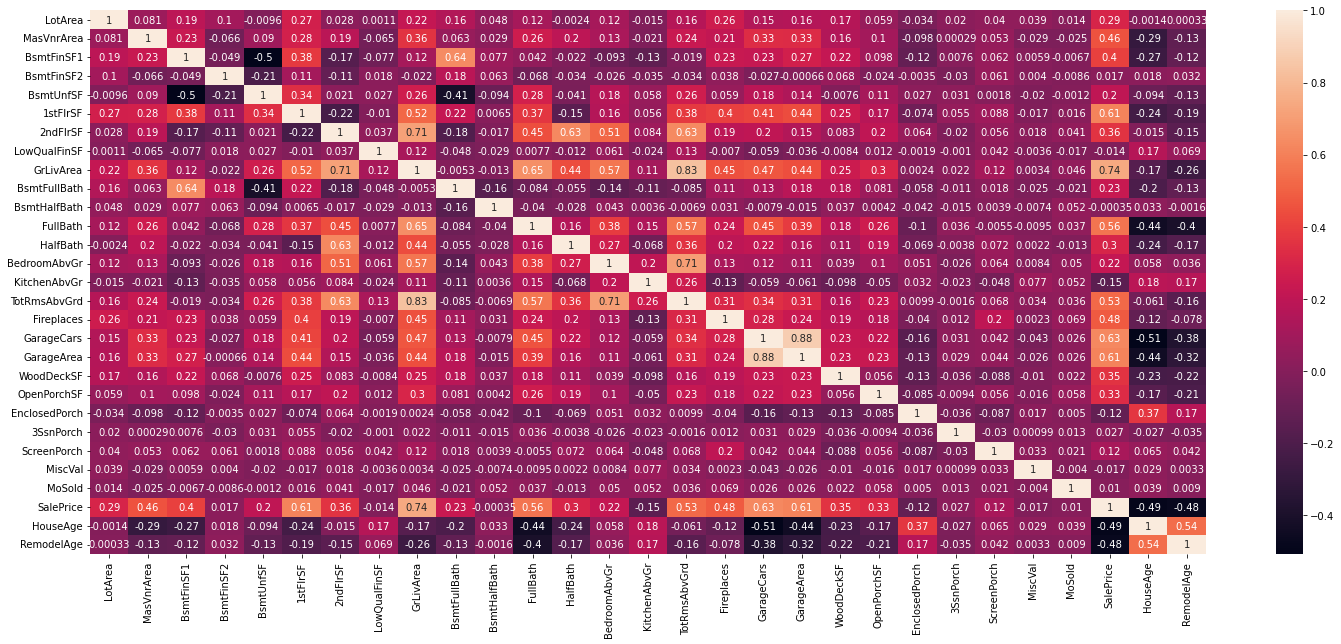

In [238]:
#The Plot does show that the response variable has some decent correlation with few of the indpendent variables
cor = data4.corr()
cor
fig,ax= plt.subplots()
fig.set_size_inches(25,10)
sns.heatmap(cor, annot=True)

In [239]:
cols = data4.columns
num_cols = data4._get_numeric_data().columns
cat_list = list(set(cols) - set(num_cols))

In [240]:
num_cols

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'SalePrice', 'HouseAge', 'RemodelAge'],
      dtype='object')

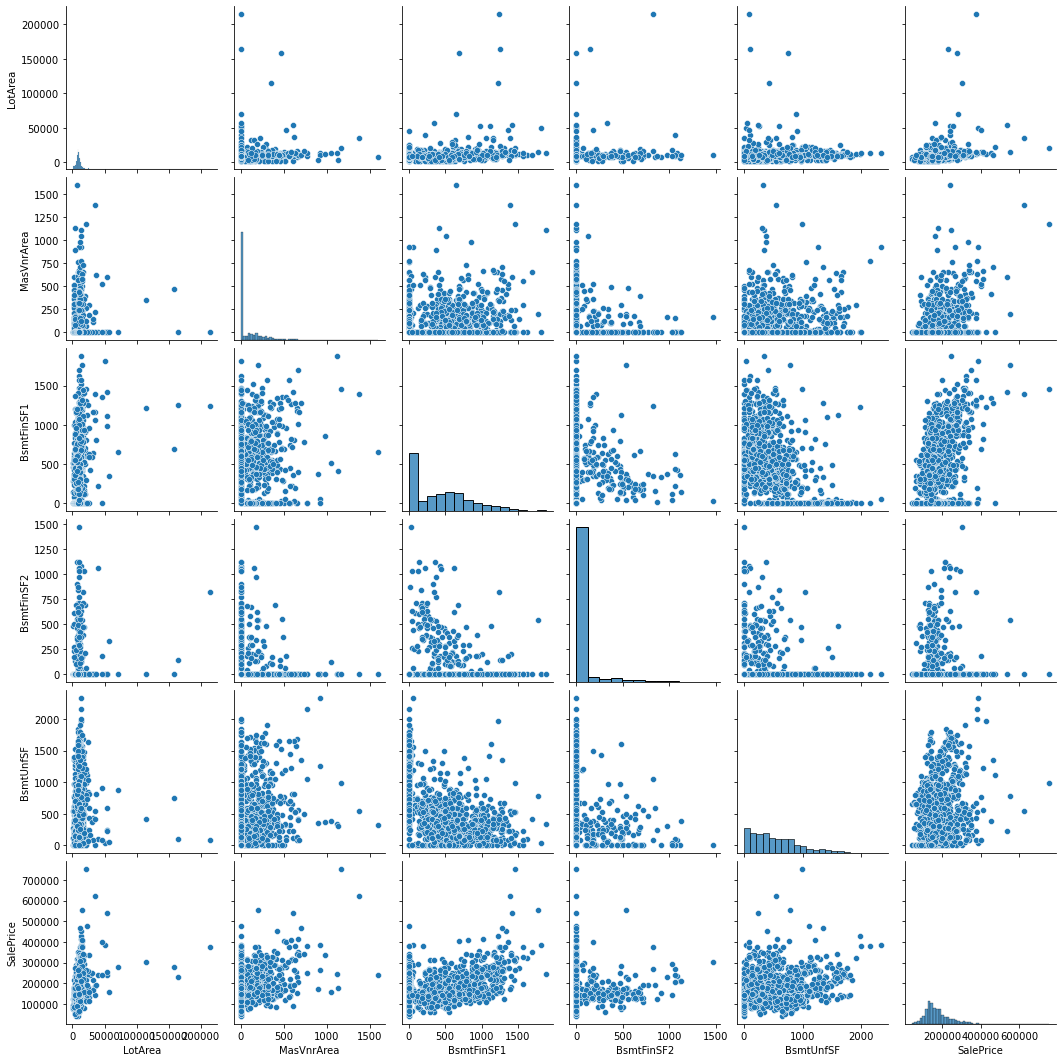

In [241]:
#Start looking at visualizations between continuous variables, some plots do exhibit linear regression
sns.pairplot(data4[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','SalePrice']])
plt.show()

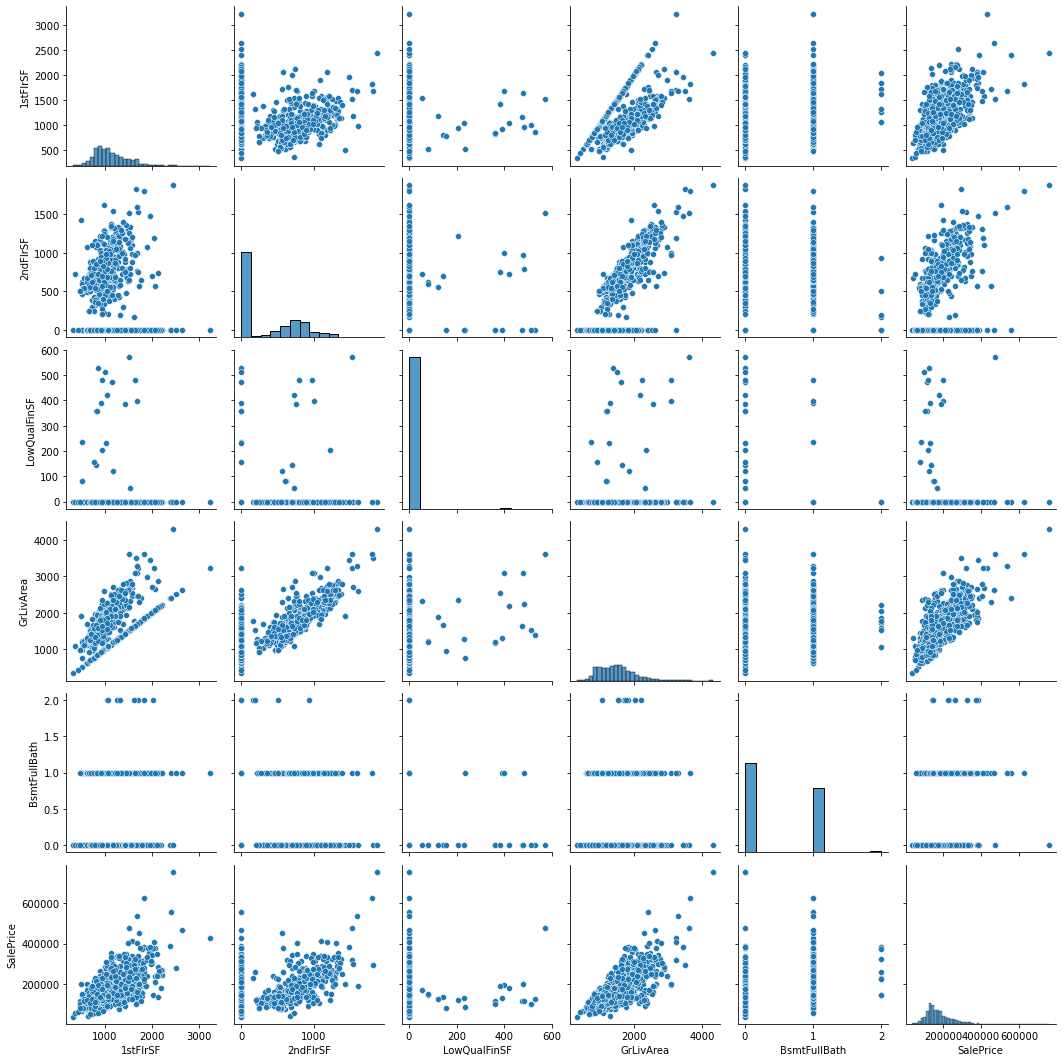

In [242]:
#Start looking at visualizations between continuous variables, some plots do exhibit linear regression
sns.pairplot(data4[['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'SalePrice']])
plt.show()

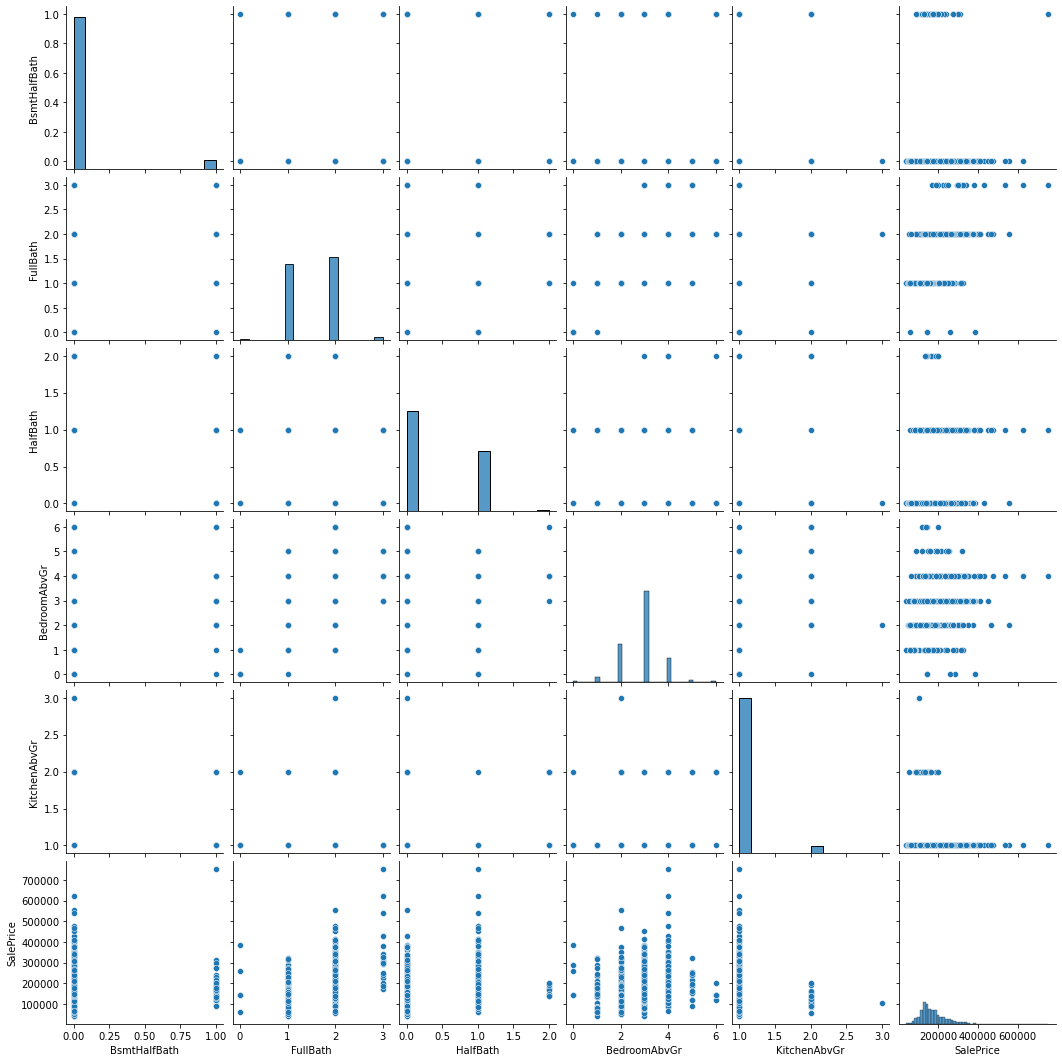

In [243]:
#Start looking at visualizations between continuous variables, some plots do exhibit linear regression
sns.pairplot(data4[['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']])
plt.show()

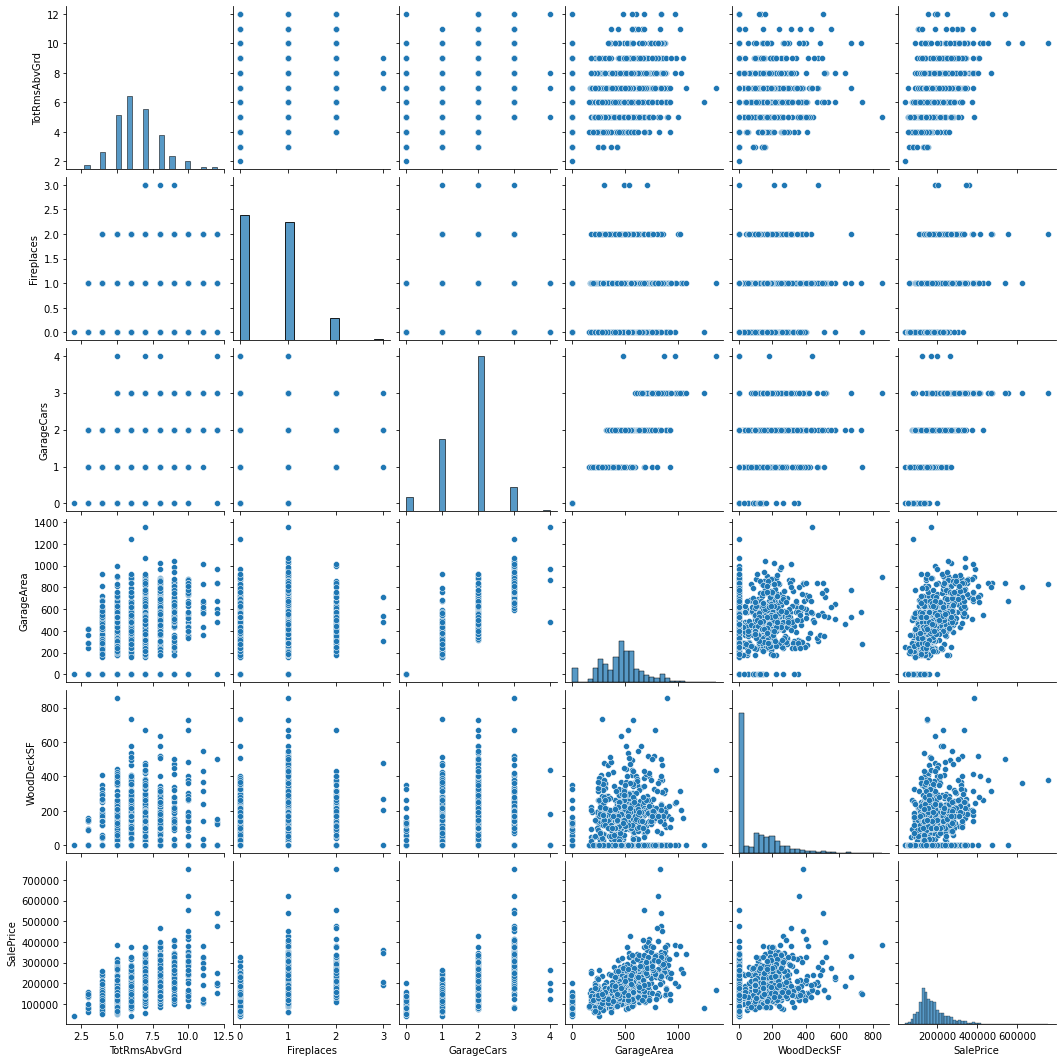

In [244]:
#Start looking at visualizations between continuous variables, some plots do exhibit linear regression
sns.pairplot(data4[['TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'SalePrice']])
plt.show()

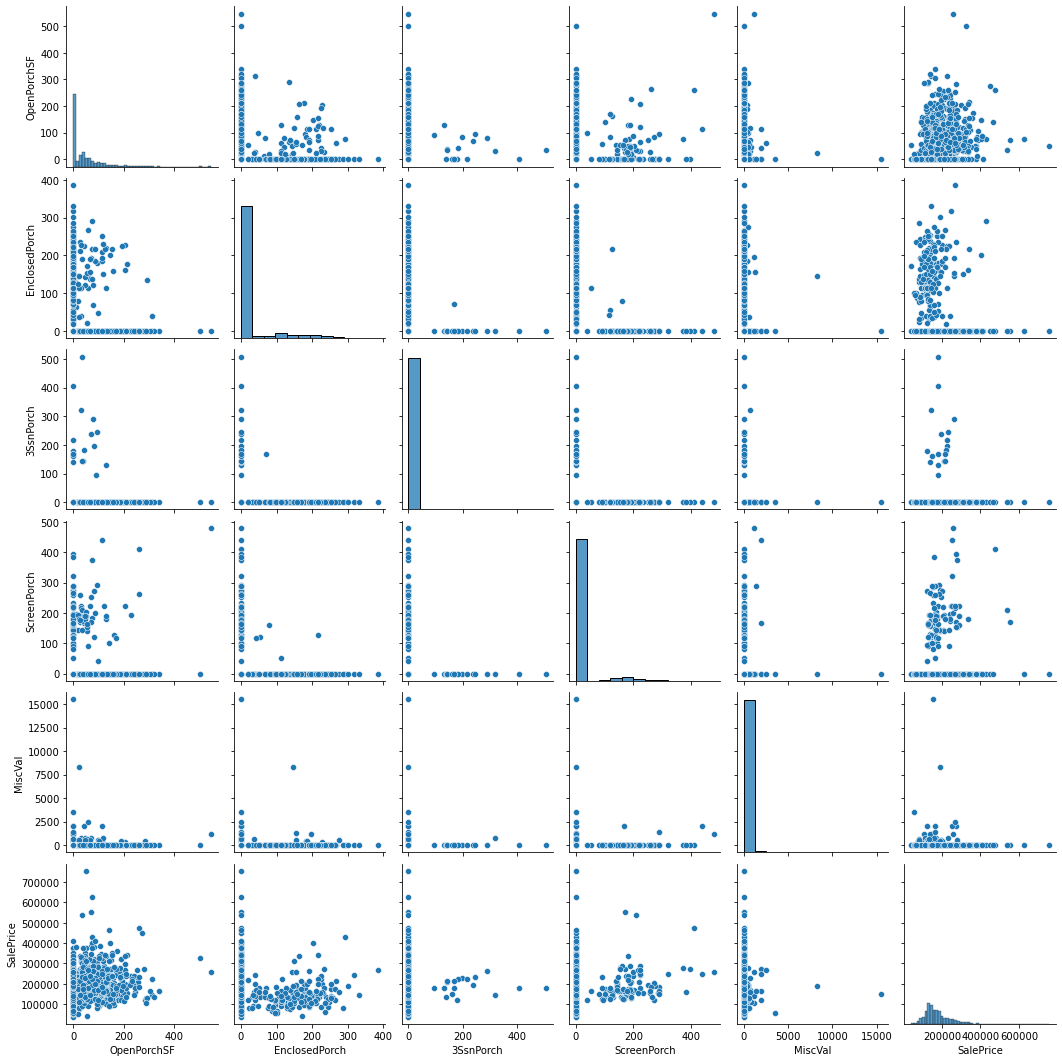

In [245]:
#Start looking at visualizations between continuous variables, some plots do exhibit linear regression
sns.pairplot(data4[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']])
plt.show()

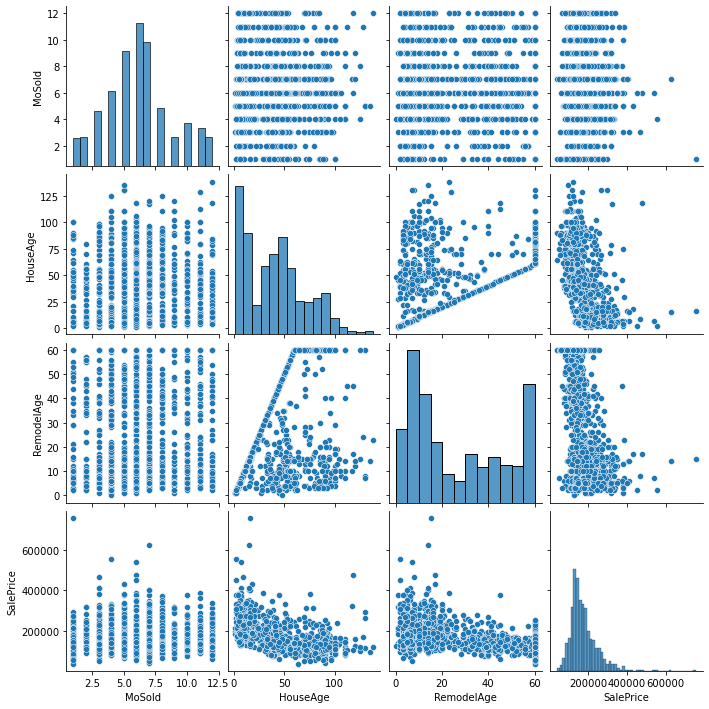

In [246]:
#Start looking at visualizations between continuous variables, some plots do exhibit linear regression
sns.pairplot(data4[['MoSold', 'HouseAge', 'RemodelAge', 'SalePrice']])
plt.show()

#### Now that the data is clean to consume, performing dummification on the categorical variables

In [247]:
cat_list

['ExterQual',
 'OverallCond',
 'BsmtQual',
 'LotShape',
 'Neighborhood',
 'FireplaceQu',
 'MasVnrType',
 'HouseStyle',
 'Fence',
 'OverallQual',
 'MSSubClass',
 'HeatingQC',
 'GarageFinish',
 'GarageType',
 'LotConfig',
 'BsmtFinType1',
 'KitchenQual',
 'Foundation',
 'Exterior1st',
 'BsmtExposure',
 'Alley',
 'Exterior2nd']

In [248]:
# Let's drop the first column from status df using 'drop_first = True'
df_trans = pd.get_dummies(data4, columns = ['ExterQual',
 'OverallCond',
 'BsmtQual',
 'LotShape',
 'Neighborhood',
 'FireplaceQu',
 'MasVnrType',
 'HouseStyle',
 'Fence',
 'OverallQual',
 'MSSubClass',
 'HeatingQC',
 'GarageFinish',
 'GarageType',
 'LotConfig',
 'BsmtFinType1',
 'KitchenQual',
 'Foundation',
 'Exterior1st',
 'BsmtExposure',
 'Alley',
 'Exterior2nd'], drop_first = True)

#### Splitting data into Train & Test

In [249]:
#Post encoding the dataset, we shall now split the data into Train & Test using a standard split of 70:30
np.random.seed(0)
df_train, df_test = train_test_split(df_trans, train_size = 0.7, test_size = 0.3, random_state = 100)

In [250]:
#Initializing the scaler
scaler = MinMaxScaler()

In [251]:
# Apply scaler() to all numerical columns
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [252]:
#In case of Test dataset we do not fit but only transform
df_test[num_cols] = scaler.transform(df_test[num_cols])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

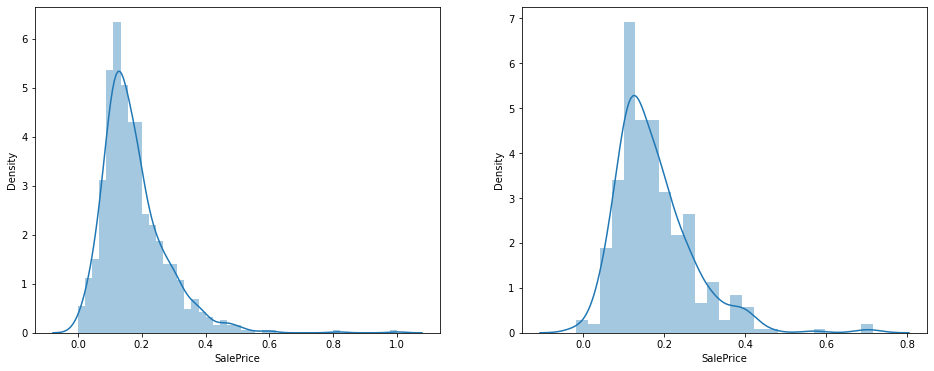

In [253]:
#Checking for distributions after scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [254]:
#Assigning Train and Test Dataframes
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [255]:
len(X_train.columns)

176

In [256]:
#Trying to fit an RFE model with 50 features to select from a huge list of columns
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,30)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [257]:
#CHecking the columns selected by RFE
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [258]:
rfe_scores

,Column_Names,Status,Rank
0,LotArea,True,1
1,MasVnrArea,False,5
2,BsmtFinSF1,True,1
3,BsmtFinSF2,True,1
4,BsmtUnfSF,True,1
...,...,...,...
171,Exterior2nd_Stone,True,1
172,Exterior2nd_Stucco,False,88
173,Exterior2nd_VinylSd,False,61
174,Exterior2nd_Wd Sdng,False,91


In [259]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [260]:
#Subsetting the train and test data to only rfe selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [261]:
X_train_orig = X_train
X_test_orig = X_test

In [262]:
#Fitting a LR Model with the selected features
lm0  = LinearRegression()
lm0.fit(X_train,y_train)

LinearRegression()

In [263]:
#Checking the train and test error
y_train_pred = lm0.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm0.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9148413729520654
0.8737680114184516


#### As the dataset is small and if we observe we still can look at the Train accuracies being higher than test accuracies, this is a clear sign of overfitting maybe on a small scale, but needs regularization

### Lasso Regression (Optimum value : 0.001)

In [264]:
#Setting different values of lambda to see where it best fits and explains variances similarly in both the train and test data
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [265]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006701,0.000895,0.003835,0.000542,0.001,{'alpha': 0.001},0.867010,0.853695,0.825720,0.791801,...,0.850467,0.863037,0.858355,0.858667,0.849753,0.86148,0.855721,0.857212,0.856874,0.004049
1,0.007159,0.000676,0.004019,0.000584,0.010,{'alpha': 0.01},0.211578,0.138967,0.107327,0.201477,...,0.137075,0.148816,0.149201,0.141922,0.155939,0.15294,0.154693,0.134211,0.143718,0.009302
2,0.006284,0.000898,0.003894,0.000301,0.100,{'alpha': 0.1},-0.016183,-0.012012,-0.005260,-0.000696,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.005872,0.000680,0.003494,0.000672,1.000,{'alpha': 1.0},-0.016183,-0.012012,-0.005260,-0.000696,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.006698,0.000375,0.004189,0.000397,5.000,{'alpha': 5.0},-0.016183,-0.012012,-0.005260,-0.000696,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


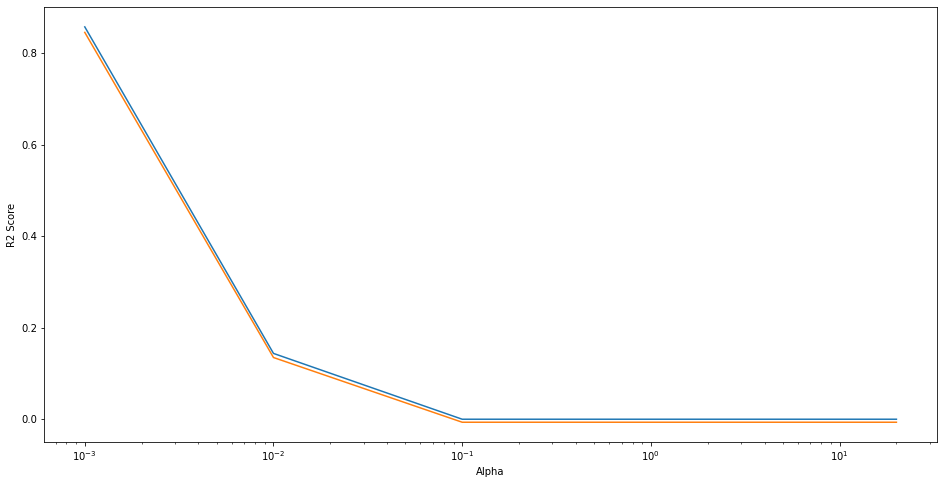

In [266]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [267]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [268]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8565339834854958
0.8341813056186848


In [269]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [270]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
7,LowQualFinSF,0.355375
19,WoodDeckSF,0.135877
18,GarageArea,0.091215
2,BsmtFinSF1,0.072901
10,BsmtHalfBath,0.061598
20,OpenPorchSF,0.049494
0,LotArea,0.034031
4,BsmtUnfSF,0.019255
5,1stFlrSF,0.018513
17,GarageCars,0.015380


#### If lambda of 0.002 is chosen, what will happen ?

In [272]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7833698198727885
0.7716579843680001


In [273]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [274]:
lasso_coef.sort_values(by='Coef',ascending=False)

,Featuere,Coef
7,LowQualFinSF,0.338363
10,BsmtHalfBath,0.071642
2,BsmtFinSF1,0.056044
18,GarageArea,0.055267
20,OpenPorchSF,0.043818
0,LotArea,0.041655
19,WoodDeckSF,0.027815
22,3SsnPorch,0.013540
5,1stFlrSF,0.008705
27,RemodelAge,-0.000000


#### If we see lasso equalises the accuracies between train and test datasets, i.e., model has been regularized, moreover Lasso also provides feature selection and hence we see the most important variables listed above

### Ridge Regression (Optimum Value : 0.5)

In [275]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [276]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005498,0.001035,0.003803,0.000382,0.001,{'alpha': 0.001},0.903571,0.920997,0.914542,0.844792,...,0.913311,0.920855,0.914333,0.915919,0.913152,0.919735,0.914666,0.913493,0.915352,0.002604
1,0.005985,0.000632,0.003689,0.000639,0.010,{'alpha': 0.01},0.903420,0.920878,0.914397,0.844711,...,0.913310,0.920852,0.914330,0.915916,0.913144,0.919725,0.914652,0.913489,0.915347,0.002604
2,0.006204,0.000770,0.003776,0.000446,0.100,{'alpha': 0.1},0.902468,0.919953,0.913077,0.844261,...,0.913201,0.920732,0.914208,0.915805,0.912936,0.919410,0.914414,0.913362,0.915190,0.002581
3,0.006283,0.000457,0.004089,0.000537,0.200,{'alpha': 0.2},0.901987,0.919099,0.911653,0.843948,...,0.912968,0.920509,0.913989,0.915588,0.912672,0.918896,0.914127,0.913143,0.914933,0.002539
4,0.006158,0.000757,0.004038,0.000483,0.500,{'alpha': 0.5},0.901835,0.916886,0.907421,0.843235,...,0.911971,0.919572,0.913051,0.914654,0.911667,0.917128,0.913062,0.912229,0.913906,0.002428


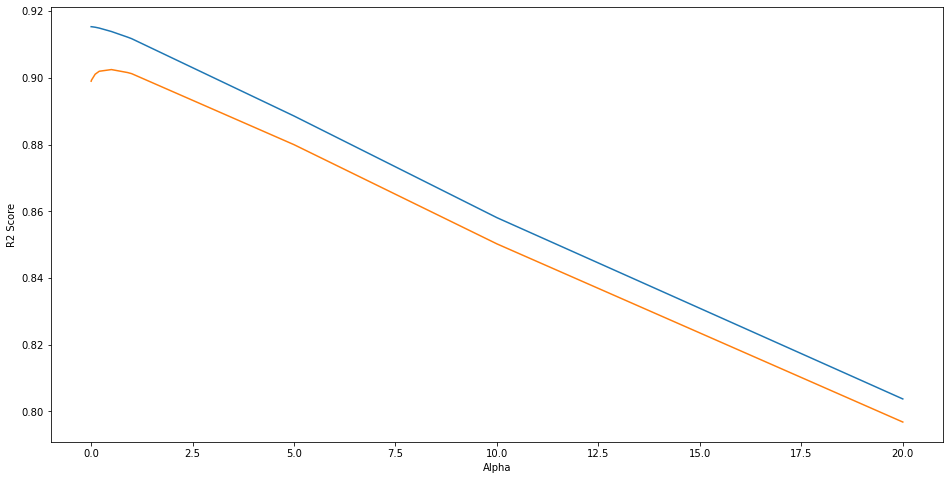

In [277]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [278]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.5}

In [279]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9136485261606219
0.8812225156527516


In [280]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [281]:
ridge_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
19,WoodDeckSF,0.216285
7,LowQualFinSF,0.165217
5,1stFlrSF,0.158662
1,MasVnrArea,0.156193
18,GarageArea,0.116636
6,2ndFlrSF,0.115205
2,BsmtFinSF1,0.105980
4,BsmtUnfSF,0.075488
3,BsmtFinSF2,0.055149
10,BsmtHalfBath,0.052945


#### We see that Lasso regularizes well against Ridge and hence can be considered as the final model

#### If Lambda of 1 is chosen for Ridge regression, what will happen ?

In [282]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.911791352732187
0.8832754009315805


In [283]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [284]:
ridge_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
19,WoodDeckSF,0.204785
7,LowQualFinSF,0.165161
5,1stFlrSF,0.153327
1,MasVnrArea,0.133709
18,GarageArea,0.114265
6,2ndFlrSF,0.111830
2,BsmtFinSF1,0.106151
4,BsmtUnfSF,0.075107
10,BsmtHalfBath,0.056967
3,BsmtFinSF2,0.051965


#### The top 5 variables are not present in the incoming data, Remodel and find new imp variables

In [290]:
X_train.head()

,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageCars,...,GarageFinish_No_Garage,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,Foundation_Wood,Exterior1st_CBlock,Exterior2nd_Stone
884,0.037096,0.238674,0.000000,0.196918,0.182073,0.000000,0.117071,0.500000,0.0,0.25,...,0,1,0,0,0,0,0,0,0,0
1225,0.058224,0.280110,0.000000,0.034675,0.268207,0.000000,0.180505,0.500000,0.0,0.25,...,0,1,0,0,0,0,0,0,0,0
377,0.062416,0.000000,0.000000,0.676370,0.422969,0.473291,0.522950,0.666667,0.0,0.50,...,0,1,0,0,0,0,0,0,0,0
330,0.059125,0.022099,0.179104,0.609589,0.474790,0.000000,0.332646,1.000000,0.5,0.25,...,0,0,0,0,0,1,0,0,0,0
1358,0.005181,0.208840,0.000000,0.161815,0.139006,0.429487,0.292677,0.500000,0.0,0.50,...,0,0,0,0,0,1,0,0,0,0


In [291]:
lasso_X_train = df_train.drop(['LowQualFinSF', 'BsmtHalfBath','BsmtFinSF1','GarageArea','OpenPorchSF'], axis = 1)
lasso_y_train = y_train
lasso_X_test = df_test.drop(['LowQualFinSF', 'BsmtHalfBath','BsmtFinSF1','GarageArea','OpenPorchSF'], axis = 1)
lasso_y_test = y_test

In [292]:
#Setting different values of lambda to see where it best fits and explains variances similarly in both the train and test data
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(lasso_X_train,lasso_y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [293]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.014925,0.002097,0.006310,0.000721,0.001,{'alpha': 0.001},0.864255,0.895363,0.791122,0.810310,...,0.867177,0.877550,0.872872,0.871401,0.866536,0.872345,0.873179,0.869873,0.871695,0.003239
1,0.012543,0.001257,0.006087,0.001047,0.010,{'alpha': 0.01},0.484066,0.481621,0.307245,0.473662,...,0.451669,0.434619,0.440219,0.445489,0.437813,0.442286,0.437380,0.431087,0.438536,0.007061
2,0.012131,0.001073,0.007003,0.000425,0.100,{'alpha': 0.1},-0.016183,-0.012012,-0.005260,-0.000696,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.012961,0.001417,0.006875,0.000845,1.000,{'alpha': 1.0},-0.016183,-0.012012,-0.005260,-0.000696,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.012727,0.001800,0.006021,0.000897,5.000,{'alpha': 5.0},-0.016183,-0.012012,-0.005260,-0.000696,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


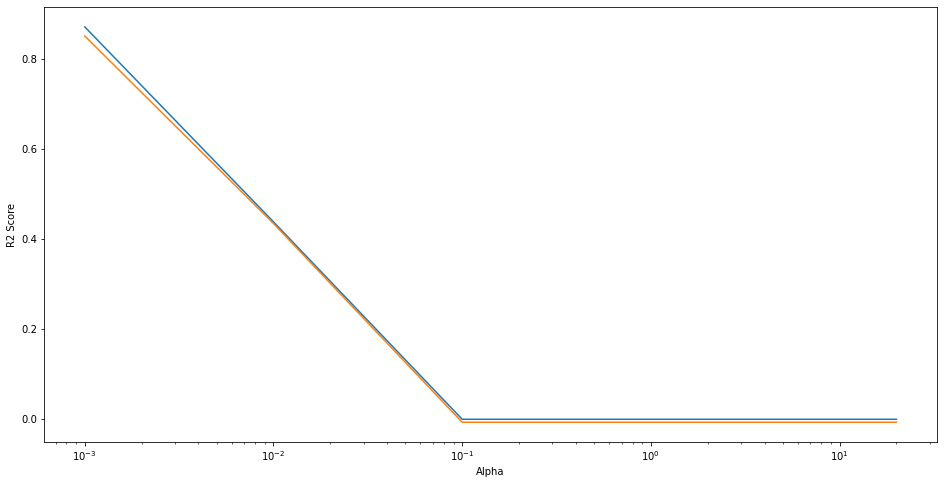

In [294]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [295]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [297]:
lasso = Lasso(alpha=0.001)
lasso.fit(lasso_X_train,lasso_y_train)

y_train_pred = lasso.predict(lasso_X_train)
y_test_pred = lasso.predict(lasso_X_test)

print(r2_score(y_true=lasso_y_train,y_pred=y_train_pred))
print(r2_score(y_true=lasso_y_test,y_pred=y_test_pred))

0.8707947782175961
0.8356245947979973


In [301]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = lasso_X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [302]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
7,BsmtFullBath,0.285533
91,OverallQual_V_Good,0.105529
0,LotArea,0.084642
87,OverallQual_Fair,0.067429
15,WoodDeckSF,0.045202
92,OverallQual_V_Poor,0.029285
152,BsmtExposure_Mn,0.028671
126,BsmtFinType1_LwQ,0.021728
5,2ndFlrSF,0.021397
56,Neighborhood_NridgHt,0.021307
